<a href="https://colab.research.google.com/github/robomoan/Data_Science_Study/blob/main/hg_ml_ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비지도 학습

## 군집 알고리즘

### 데이터 준비하기

과일 데이터 출처: https://www.kaggle.com/moltean/fruits

In [ ]:
# 데이터 다운로드하기
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2021-03-24 17:06:22--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-03-24 17:06:22--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-03-24 17:06:23--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:4

In [ ]:
# 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
fruits = np.load('fruits_300.npy')

In [ ]:
# 데이터 형태 확인
print(fruits.shape)

(300, 100, 100)


In [ ]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


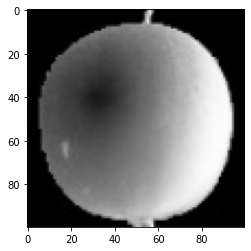

In [ ]:
# 300개의 이미지 중 첫번째 이미지 그리기
plt.imshow(fruits[0], cmap = 'gray')
plt.show()

데이터 값이 큰 부분이 밝은 부분, 작은 부분이 어두운 부분이다.  
데이터 값이 큰 부분에 의미를 부여하기 좋기 때문에 사과의 색상을 반전시키고 훈련시킨다.

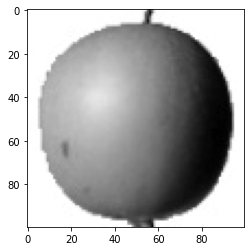

In [ ]:
# 사람이 보기 좋게 색상 반전하여 그리기
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

fruit 데이터는 300개 중 1\~100번째 이미지는 사과, 101\~200번째 이미지는 파인애플, 201\~300번째 이미지는 바나나를 가지고 있다.

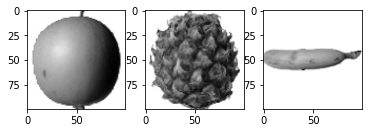

In [ ]:
# 사과, 파인애플, 바나나 각 첫번째 이미지 불러오기
fig, axs = plt.subplots(1, 3)
axs[0].imshow(fruits[0], cmap='gray_r')
axs[1].imshow(fruits[100], cmap='gray_r')
axs[2].imshow(fruits[200], cmap='gray_r')
plt.show()

### 픽셀값 분석하기

In [ ]:
# 100X100 이미지 데이터를 펼쳐 1차원 데이터로 만들기
apple = fruits[0:100].reshape(-1, 10000)
pineapple = fruits[100:200].reshape(-1, 10000)
banana = fruits[200:300].reshape(-1, 10000)

In [ ]:
print(apple.shape)

(100, 10000)


In [ ]:
# 각 행에 대해서 10000개 값의 평균 데이터 구하기
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


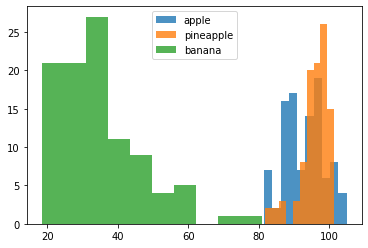

In [ ]:
# 히스토그램 그리기
plt.hist(np.mean(apple, axis=1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

각 이미지의 평균(axis = 1)이 아닌 픽셀별로 평균(axis = 0)을 내어 막대그래프로 그려보자

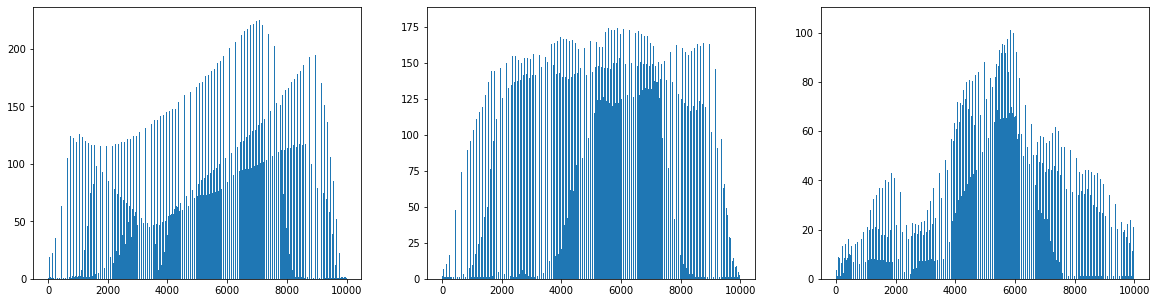

In [ ]:
# 막대그래프 그리기
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()

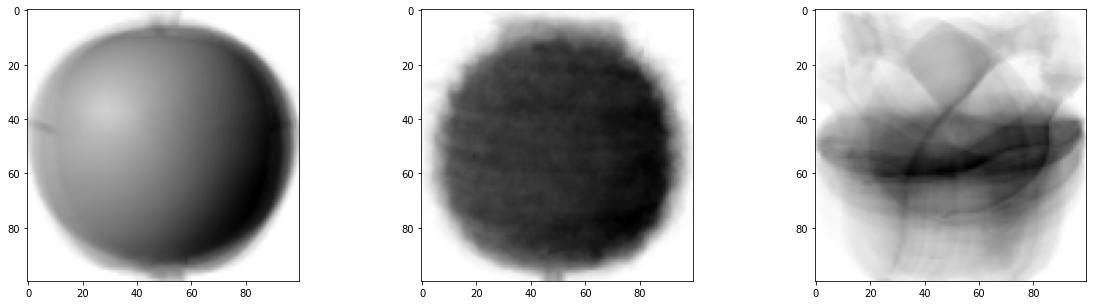

In [ ]:
# 픽셀 당 평균값으로 과일별 평균 이미지 만들기
apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()

### 평균값과 가까운 사진 고르기

In [ ]:
print(fruits.shape, apple_mean.shape)

(300, 100, 100) (100, 100)


In [ ]:
# fruit 배열의 모든 샘플에서 apple_mean을 뺀 절댓값의 평균 계산
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis = (1, 2))
print(abs_mean.shape)

(300,)


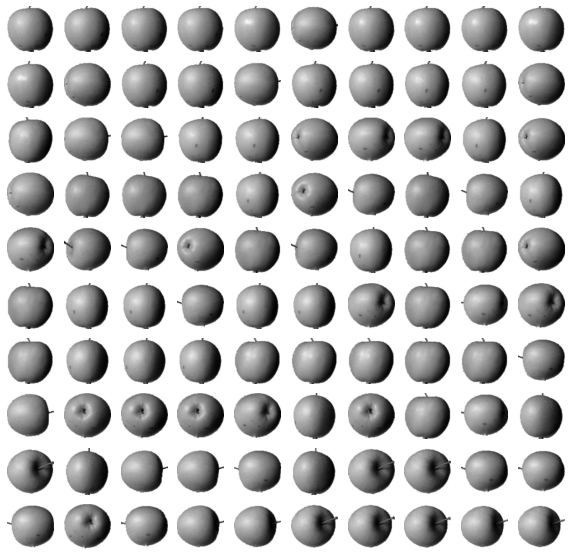

In [ ]:
# abs_mean이 작은 순서대로 100개 뽑아서 그리기
apple_index = np.argsort(abs_mean)[:100]
gif, axs = plt.subplots(10, 10, figsize = (10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap = 'gray_r')
    axs[i, j].axis('off') # 좌표축을 그리지 않겠다는 뜻
plt.show()

100개 모두 사과로 잘 예측했다.

## K-평균

### KMeans 클래스

In [ ]:
# 데이터 다운로드하기
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2021-03-24 17:07:15--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-03-24 17:07:15--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-03-24 17:07:15--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:4

In [ ]:
import numpy as np
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1, 10000)

In [ ]:
# K 평균 모델 훈련하기
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
# 300개의 각 샘플이 각각 어느 레이블에 속하는지 알아보기
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
# 0, 1, 2 로 모은 샘플 개수 세기
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


이미지 출력용 유틸함수 'draw_fruits()' 만들기

In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):
  n = len(arr) # n은 샘플 개수
  rows = int(np.ceil(n/10)) # 행 갯수 정의 한 줄에 10개 그릴거임
  cols = n if rows < 2 else 10 # 열 갯수 정의

  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

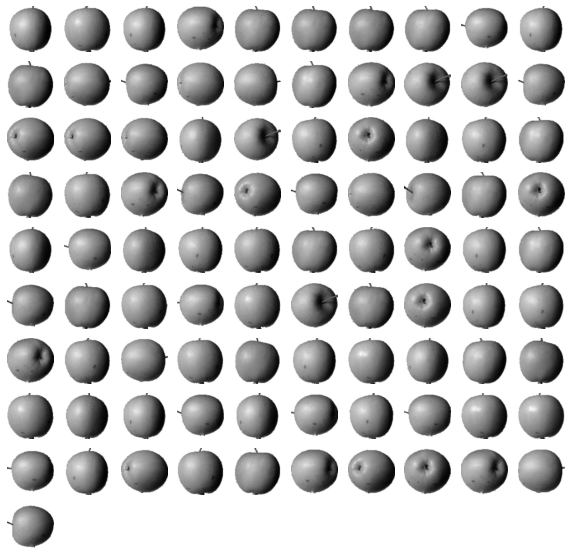

In [ ]:
# K-평균 모델로 사과라고 예측한 이미지 불러오기
draw_fruits(fruits[km.labels_==0])

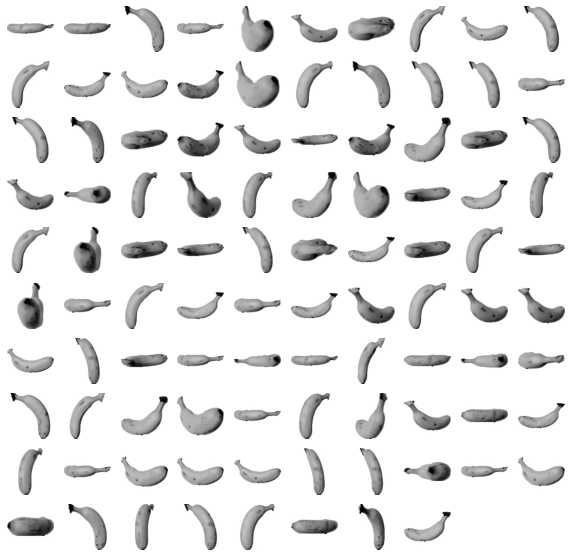

In [ ]:
# K-평균 모델로 바나나라고 예측한 이미지 불러오기
draw_fruits(fruits[km.labels_ == 1])

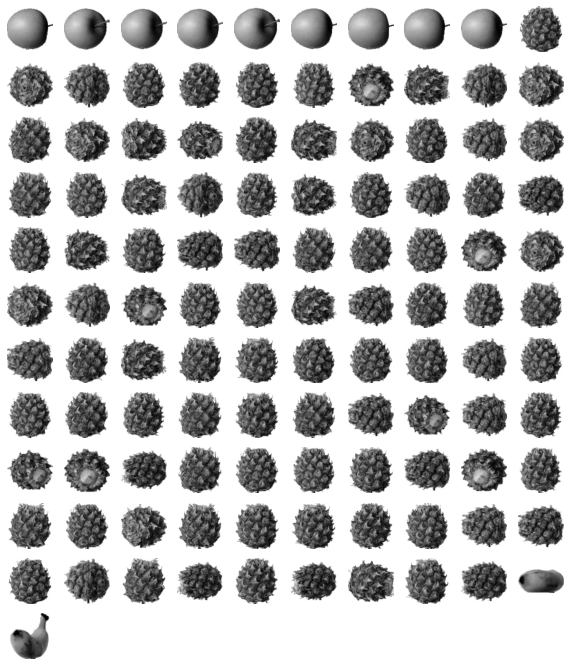

In [ ]:
# K-평균 모델로 파인애플이라고 예측한 이미지 불러오기
draw_fruits(fruits[km.labels_ == 2])

### 클러스터 중심

In [ ]:
# KMeans 클래스가 최종적으로 찾은 클러스터 중심
print(km.cluster_centers_.shape)

(3, 10000)


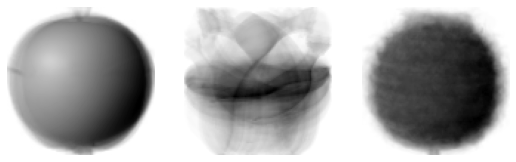

In [ ]:
# 클러스터 중심 이미지 그리기
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio = 3)

In [ ]:
# 훈련 데이터 샘플에서 클러스터 중심까지의 거리 반환
print(km.transform(fruits_2d[100:101]))  # 100번째 인덱스 샘플

[[5267.70439881 8837.37750892 3393.8136117 ]]


세번째 클러스터까지의 거리가 3393으로 가장 작다.

In [ ]:
# 100번째 인덱스 샘플의 예측값 출력
print(km.predict(fruits_2d[100:101]))

[2]


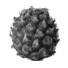

In [ ]:
# 100번째 인덱스 샘플의 이미지 출력
draw_fruits(fruits[100:101])

In [ ]:
# 최적의 클러스터를 찾기까지 알고리즘이 반복한 횟수
print(km.n_iter_)

3


### 최적의 k 찾기

이너셔(inertia): 클러스터 중심과 클러스터에 속한 샘플 사이의 거리 제곱의 합  
클러스터 수 늘어나면 각 클러스터의 크기는 줄어들기 때문에 이너셔도 줄어듦  
클러스터 개수를 늘려가면서 이너셔를 그래프로 그리면 꺾이는 지점이 생김

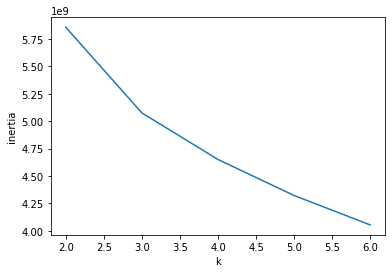

In [ ]:
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

k = 3일때 그래프의 기울기가 조금 바뀐 것을 볼 수 있음 

## 주성분 분석

주성분은 데이터의 분산이 큰 방향을 데이터로 잘 표현하는 벡터  


In [ ]:
# 데이터 다운로드 하기
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2021-03-24 17:07:31--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-03-24 17:07:31--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-03-24 17:07:31--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:4

In [ ]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 10000)

### PCA 클래스
principal component analysis

In [ ]:
# PCA 모델 훈련하기
from sklearn.decomposition import PCA
pca = PCA(n_components = 50) # n_components로 주성분 개수 지정
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# PCA 클래스가 찾은 주성분 속성 크기 확인하기
print(pca.components_.shape)

(50, 10000)


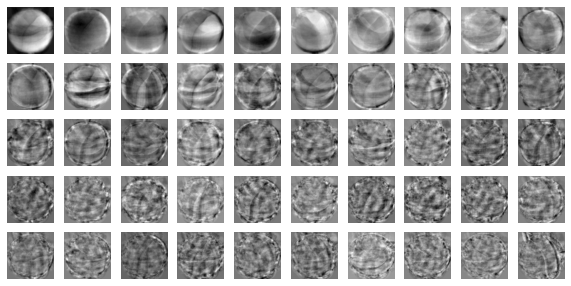

In [ ]:
# 주성분 그림 그리기
draw_fruits(pca.components_.reshape(-1, 100, 100))

원본 데이터에서 분산이 큰 방향을 순서대로 나열한 것이다.

In [ ]:
# 원본 데이터의 차원을 50으로 줄이기
print(fruits_2d.shape) # 원본 데이터

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 변환 후 데이터

(300, 10000)
(300, 50)


### 원본 데이터 재구성

복원 매서드: inverse_transform()

In [ ]:
# 복원하기
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


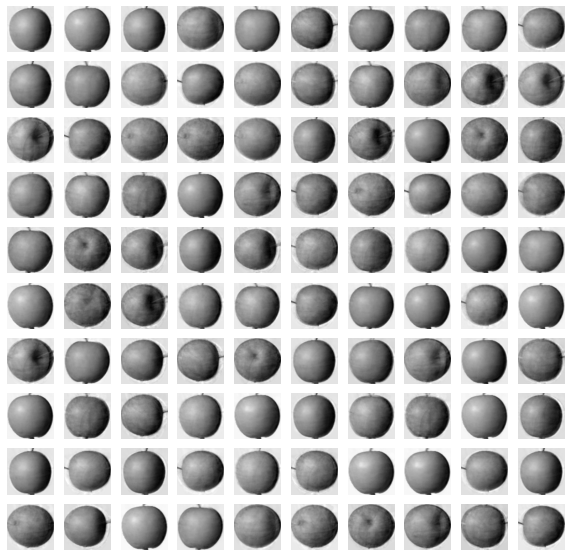

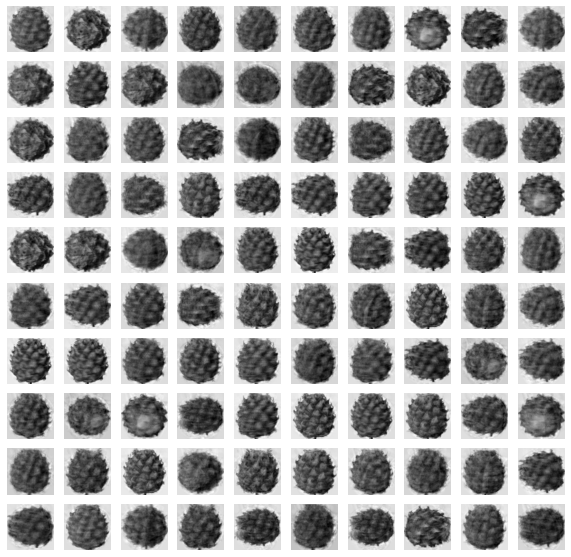

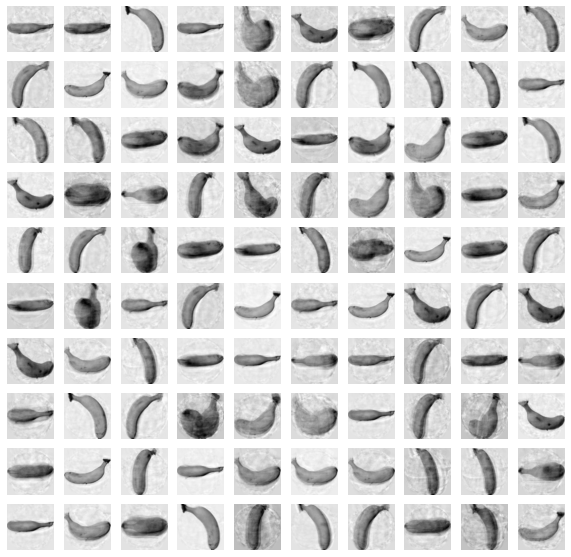

In [ ]:
# 복원된 데이터로 이미지 출력하기
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

과일 이미지가 잘 복원되었다.

### 설명된 분산

설명된 분산: 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값  
explained\_variance\_ratio\_ 에 각 주성분의 설명된 분산 비율이 기록되어 있다.

In [ ]:
print(pca.explained_variance_ratio_.shape)

(50,)


In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215452596175115


주성분 50개는 원본 데이터의 분산을 92% 보존하고 있다.

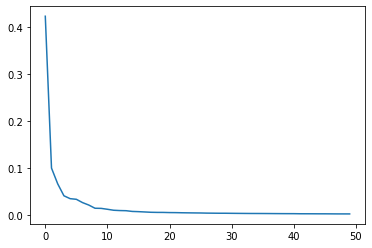

In [ ]:
# 설명된 분산 비율 그래프 그리기
plt.plot(pca.explained_variance_ratio_)
plt.show()

처음 10개의 주성분이 대부분의 분산을 표현하고 있음을 알 수 있다.

### 다른 알고리즘과 함께 사용하기

#### 로지스틱 회귀 모델
원본 데이터와 PCA로 축소한 데이터를 로지스틱 회귀 모델에 적용하기

In [ ]:
# 로지스틱 회귀 모델 부르기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

타깃 데이터 설정  
사과: 0, 파인애플: 1, 바나나: 2

In [ ]:
# 타깃 데이터 만들기
target = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
# 원본 데이터로 교차검증 수행하기
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.0888582229614259


특성이 10,000개이기 때문에 과대적합된 모델을 만들기 쉽다.

In [ ]:
# PCA로 축소한 데이터로 교차검증 수행하기
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03719964027404785


설명된 분산의 비율을 설정하여 주성분 개수 정할 수 있다.  
n_components에 주성분 개수가 아닌 0에서 1사이의 수를 적으면 된다.

In [ ]:
# 설명된 분산의 비율이 50%를 만족하는 주성분 개수 찾기
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.n_components_)

2


2개의 주성분만으로 설명된 분산의 비율이 50%를 만족하는 것을 알 수 있다.

In [ ]:
# 해당 PCA 모델로 원본 데이터 변환하기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
# PCA 클래스로 축소된 데이터를 로지스틱 회귀 모형에 교차검증하기
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.0699230670928954


2개 주성분만으로 99%의 정확도를 보여준다.

#### K-평균

In [ ]:
# 차원 축소된 데이터를 k-평균 알고리즘에 적용해 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


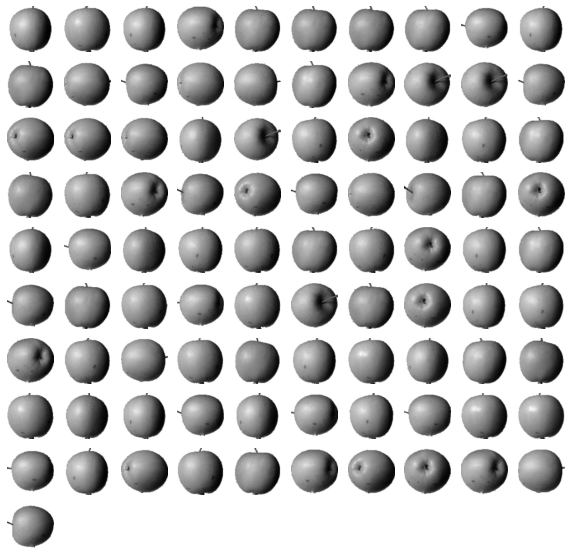

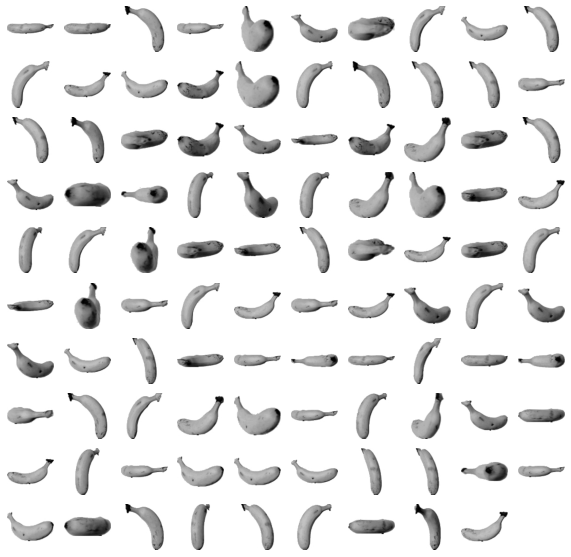

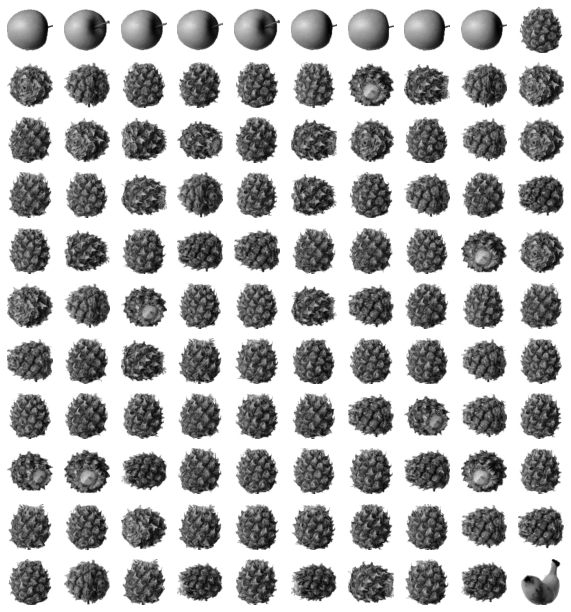

In [ ]:
# 찾은 레이블을 사용해 과일 이미지 출력
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

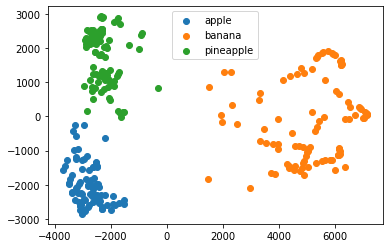

In [ ]:
# 시각화, 차원 축소된 데이터의 주성분이 2개이므로 2차원으로 표현 가능
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

사과와 파인애플 클러스터가 붙어 있어 혼동을 일으키키 쉬움을 알 수 있다. 

## 교재 외

In [ ]:
fruits_2d.mean(axis = 0).shape

(10000,)

In [ ]:
# SVD 분해
fruits_centered = fruits_2d - fruits_2d.mean(axis = 0)
U, s, Vt = np.linalg.svd(fruits_centered)
print(U.shape, s.shape, Vt.shape)

(300, 300) (300,) (10000, 10000)


In [ ]:
print(fruits_centered.shape)

(300, 10000)


In [ ]:
# 주성분 2개만 사용하여 2차원 초평면 만들고 투영하기
W2 = Vt.T[:, :2]
fruits_2d_svd = fruits_centered.dot(W2)

In [ ]:
print(fruits_pca.shape)
print(fruits_2d_svd.shape)

(300, 2)
(300, 2)


In [ ]:
# 차원 축소된 데이터 복원하기(데이터 손실 발생)
fruits_recovered = fruits_2d_svd.dot(W2.T)
print(fruits_recovered.shape)
print(fruits_centered.shape)

(300, 10000)
(300, 10000)
